
# **Manipulação, Limpeza e Tratamento de Dados**
Conteúdo:
* Seleção e filtros
* Análise da qualidade das variáveis numéricas
* Recodificação de variáveis
* Criação de variáveis
* Salvar a base de dados corrigida

##**Pesquisar e preencher as células com os códigos necessários para contemplar cada tarefa.**
Créditos: https://ciia-saude.medicina.ufmg.br

# Abrir a base de dados

In [ ]:
# Importar as bibliotecas para trabalhar com base de dados e gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [ ]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS_original.xlsx'
# Ler todos os dados e colocar na variável dados
dados = pd.read_excel(arquivo)

# Mostrar destalhes/informações das variáveis importadas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DT_INTERNACAO       1709 non-null   datetime64[ns]
 1   DT_ALTA             1709 non-null   datetime64[ns]
 2   DURACAO_INT         1709 non-null   float64       
 3   GESTACOES           1709 non-null   int64         
 4   PARTOS              1708 non-null   float64       
 5   IG_OBSTETRA         1689 non-null   float64       
 6   IG_PEDIATRA         1706 non-null   float64       
 7   ALTO_RISCO          1709 non-null   object        
 8   TIPO_PARTO          1709 non-null   int64         
 9   HIPERTENSAO         1709 non-null   int64         
 10  GEMELAR             1709 non-null   int64         
 11  CESAREAS_PREVIAS    1702 non-null   float64       
 12  EPISIOTOMIA         1709 non-null   int64         
 13  ANALGESIA           1709 non-null   int64       

In [ ]:
# Criar uma lista com os nomes das colunas
colunas = list(dados.columns)
print(colunas)
dados



['DT_INTERNACAO', 'DT_ALTA', 'DURACAO_INT', 'GESTACOES', 'PARTOS', 'IG_OBSTETRA', 'IG_PEDIATRA', 'ALTO_RISCO', 'TIPO_PARTO', 'HIPERTENSAO', 'GEMELAR', 'CESAREAS_PREVIAS', 'EPISIOTOMIA', 'ANALGESIA', 'FORCEPS', 'CM_LACERACAO_CANAL', 'CM_UTI', 'CM_INFECCAO', 'CM_NEARMISS', 'CM_TRANSFUSAO', 'VIVO', 'SEXO', 'PESO_NASCER', 'APGAR1', 'APGAR5', 'UTI_RN', 'LIGADURACORDAO', 'LC_MOTIVO', 'EQUIPAMENTO_A', 'EQUIPAMENTO_B', 'UBS', 'BAIRRO', 'LATITUDE', 'LONGITUDE']


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


In [ ]:
# Mostrar um resumo dos dados (as 5 primeiras linhas e 5 últimas 5 linhas)
dados.head()


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,1,2,1.0,38.0,38.0,1,NaN,0,...,10.0,0,Não se aplica ou não informado,NaN,3405.0,3385.000000,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,1,1,0.0,36.0,36.0,1,NaN,0,...,9.0,0,Sim,NaN,2595.0,2570.000000,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,1,2,1.0,39.0,39.0,0,NaN,0,...,10.0,0,Não se aplica ou não informado,NaN,3910.0,3675.000000,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,1,2,1.0,41.0,41.0,0,NaN,0,...,10.0,0,Não se aplica ou não informado,NaN,3275.0,3300.000000,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,1,1,0.0,36.0,36.0,0,NaN,0,...,8.0,0,Sim,NaN,620.0,3083.164659,1.0,Alto dos Pinheiros,-19.907129,-43.907127


# Seleção e filtro de dados

In [ ]:
# Mostrar um resumo dos dados de 10 linhas aleatórias
dados.sample(10)

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
541,2013-11-20,2013-11-22,1.784722,1,0.0,40.0,40.0,não,1,0,...,9.0,0,2,0,3265.0,3240.0,0.0,Inconfidência,-19.990200,-44.006046
808,2013-10-28,2013-10-30,2.044444,2,1.0,39.0,39.0,sim,2,0,...,9.0,1,2,0,4230.0,4070.0,0.0,Vera Cruz,-19.893021,-43.898987
149,2014-07-24,2014-07-25,1.208333,2,1.0,39.0,39.0,não,1,0,...,10.0,0,1,0,NaN,3150.0,1.0,Santa Tereza,-19.841459,-43.949993
1568,2014-02-27,2014-03-04,4.988889,2,0.0,39.0,38.0,sim,1,0,...,9.0,0,1,0,NaN,3210.0,1.0,Boa Vista,-19.844891,-43.951931
606,2014-06-26,2014-06-28,1.875694,3,1.0,40.0,40.0,não,1,0,...,9.0,0,1,0,2974.0,3015.0,0.0,São Salvador,-19.957119,-44.001133
644,2014-03-15,2014-03-17,1.919444,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,NaN,3205.0,2.0,Santa Efigênia,-19.781490,-44.111134
584,2014-02-15,2014-02-17,1.854167,1,0.0,40.0,40.0,não,1,0,...,10.0,0,2,0,3470.0,3440.0,0.0,Alto Caiçaras,-19.920793,-43.978519
623,2013-11-10,2013-11-12,1.897222,1,0.0,40.0,40.0,sim,1,0,...,9.0,0,2,0,NaN,3340.0,5.0,Jardim Montanhês,-19.823925,-43.999935
216,2014-10-17,2014-10-18,1.311806,1,0.0,40.0,40.0,não,1,0,...,10.0,0,2,0,3900.0,3850.0,3.0,Jardim São José,-19.897884,-44.017792
734,2014-05-13,2014-05-15,2.000000,3,2.0,34.0,34.0,sim,1,0,...,8.0,1,1,0,NaN,3410.0,0.0,Alípio de Melo,-19.881205,-43.963753


In [ ]:
# Acessar os dados de uma Series (TIPO_PARTO)
dados['TIPO_PARTO']
dados.TIPO_PARTO


,TIPO_PARTO
0,1
1,1
2,1
3,1
4,1
...,...
1704,1
1705,2
1706,2
1707,2


In [ ]:
# Localizar e visualizar um sub-conjunto de dados
subset_dados = dados[(dados['GESTACOES'] > 5) & (dados['PARTOS'] > 3)]
subset_dados



,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
133,2014-05-21,2014-05-22,1.172917,6,4.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3275.0,3175.0,3.0,Califórnia,-20.010567,-44.006210
150,2014-04-06,2014-04-07,1.208333,7,6.0,37.0,37.0,sim,1,1,...,10.0,0,2,0,NaN,2800.0,1.0,Glória,-20.009916,-44.037750
157,2014-06-21,2014-06-22,1.221528,6,4.0,39.0,39.0,não,1,0,...,9.0,0,1,0,NaN,NaN,2.0,Pindorama,-19.795401,-43.947567
192,2013-11-10,2013-11-11,1.270833,7,4.0,39.0,32.0,sim,1,0,...,9.0,0,2,0,NaN,2460.0,1.0,Tupi B,-19.851623,-43.887104
220,2013-12-25,2013-12-26,1.315972,8,7.0,40.0,40.0,não,1,0,...,9.0,0,2,0,3915.0,3790.0,69.0,Conjunto Califórnia,-19.823111,-43.986679
222,2013-12-10,2013-12-12,1.319444,6,4.0,36.0,36.0,sim,1,0,...,9.0,0,2,0,3400.0,2995.0,1.0,São Geraldo,-19.914127,-43.948547
250,2014-07-13,2014-07-15,1.352083,8,6.0,39.0,39.0,não,1,0,...,9.0,0,2,0,2785.0,2775.0,0.0,Conjunto Confisco,-19.946957,-43.935673
312,2014-03-21,2014-03-23,1.447917,7,5.0,39.0,39.0,não,1,0,...,0.0,0,0,0,NaN,3730.0,2.0,Conjunto Taquaril,-19.861252,-43.931301
349,2014-02-05,2014-02-06,1.496528,6,4.0,41.0,41.0,não,1,0,...,9.0,0,1,0,3065.0,3010.0,0.0,Álvaro Camargos,-19.975614,-43.978935
384,2013-10-06,2013-10-08,1.544444,7,5.0,37.0,37.0,sim,1,0,...,10.0,0,1,0,2900.0,2895.0,1.0,Aparecida,-19.937832,-43.961838


In [ ]:
# Filtrar os 5 maiores valores de uma coluna

column_name = 'PESO_NASCER'
top_5_values = dados[column_name].nlargest(5)
filtered_dados = dados[dados[column_name].isin(top_5_values)]
filtered_dados


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
728,2013-12-02,2013-12-04,1.994444,2,1.0,38.0,38.0,não,1,0,...,9.0,0,2,0,NaN,3385.0,NaN,Inconfidência,-19.915436,-43.928944
952,2014-04-09,2014-04-11,2.166667,3,2.0,40.0,40.0,não,2,1,...,10.0,0,2,0,NaN,2239.0,1.0,Inconfidência,-19.918180,-43.931618
1041,2013-11-11,2013-11-13,2.315972,3,2.0,39.0,38.0,não,2,0,...,9.0,0,2,0,3275.0,3250.0,0.0,Álvaro Camargos,-20.018854,-44.027176
1383,2014-04-07,2014-04-10,3.070833,5,4.0,40.0,40.0,não,2,0,...,9.0,0,1,0,NaN,2900.0,0.0,Ouro Preto,-19.919867,-43.877316
1438,2014-03-17,2014-03-20,3.418056,1,0.0,29.0,20.0,sim,2,0,...,1.0,0,1,0,NaN,NaN,3.0,Nova Cachoeirinha,-19.993549,-44.018082


In [ ]:
# Filtrar os 5 menores  valores de uma coluna
column_name = 'PESO_NASCER'
bottom_5_values = dados[column_name].nsmallest(5)
filtered_dados = dados[dados[column_name].isin(bottom_5_values)]
filtered_dados


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
26,2014-05-04,2014-05-05,0.931944,2,0.0,19.0,20.0,sim,1,0,...,0.0,0,1,0,NaN,NaN,1.0,Monsenhor Messias,-19.890909,-43.900944
54,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,NaN,3410.0,136.0,Paraíso,-19.888601,-43.901932
260,2014-03-12,2014-03-13,1.364583,1,0.0,28.0,28.0,não,1,0,...,0.0,0,1,0,2965.0,2960.0,0.0,Conjunto Confisco,-19.929627,-43.973209
670,2014-02-13,2014-02-15,1.943750,2,1.0,23.0,23.0,sim,1,0,...,0.0,0,0,0,NaN,NaN,1.0,Vera Cruz,-19.892702,-43.898537
1235,2014-06-25,2014-06-28,2.717361,1,0.0,23.0,23.0,não,1,0,...,0.0,0,0,0,NaN,NaN,1.0,Caiçaras,-19.888550,-43.897469


In [ ]:
# Selecionar um sub-conjunto / intervalo de dados
# Todos os recém-nascidos nascidos à Termo, ou seja, com idade gestacional >= 37
gestational_age_column = 'IG_OBSTETRA'
term_babies = dados[dados[gestational_age_column] >= 37]
term_babies


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
5,2014-05-27,2014-05-28,0.827778,3,2.0,38.0,38.0,sim,1,0,...,9.0,0,2,0,NaN,2980.0,47.0,Carlos Prates,-19.837263,-44.000755
6,2013-11-30,2013-12-01,0.838889,2,1.0,38.0,38.0,não,1,0,...,9.0,0,2,0,3280.0,3090.0,1.0,Novo Glória,-20.008207,-44.030563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2014-07-26,2014-08-28,32.827083,1,0.0,38.0,38.0,sim,2,0,...,9.0,0,2,0,NaN,NaN,126.0,Jardim Montanhês,-19.808807,-44.002148
1702,2014-06-26,2014-07-29,32.916667,4,1.0,40.0,40.0,sim,1,0,...,8.0,0,2,0,2960.0,2875.0,2.0,Dom Bosco,-19.927525,-43.970512
1703,2014-07-13,2014-08-15,33.122917,4,2.0,39.0,39.0,sim,2,0,...,9.0,0,2,0,NaN,3665.0,3.0,São Lucas,-19.880920,-43.952335
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157


In [ ]:
# Localizar e visualizar um sub-conjunto de dados
# Todos os recém-nascidos prematuros, ou seja, com idade gestacional <= 36
gestational_age_column = 'IG_OBSTETRA'
premature_babies = dados[dados[gestational_age_column] <= 36]
premature_babies




,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
15,2013-12-05,2013-12-06,0.886806,1,0.0,35.0,35.0,não,1,0,...,10.0,0,2,0,2900.0,2100.0,125.0,Glória,-19.933382,-44.007568
18,2014-07-28,2014-07-29,0.902778,4,3.0,36.0,36.0,sim,1,0,...,10.0,0,2,0,2725.0,2790.0,119.0,Dom Bosco,-19.915789,-43.884346
22,2014-02-21,2014-02-22,0.908333,1,0.0,36.0,39.0,sim,1,0,...,0.0,0,1,0,NaN,NaN,111.0,Conjunto Califórnia,-19.882975,-43.940681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2014-02-16,2014-03-17,29.011806,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,NaN,3015.0,0.0,São Lucas,-19.882309,-43.958775
1695,2014-02-12,2014-03-17,32.364583,4,2.0,25.0,28.0,sim,1,0,...,8.0,0,1,0,NaN,3080.0,113.0,"Serra Verde, Venda Nova",-19.886316,-43.949482
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734


In [ ]:
# Selecionar um sub-conjunto / intervalo de dados
# Todos os recém-nascidos prematuros que são gemeos
gestational_age_column = 'IG_OBSTETRA'
twin_column = 'GEMELAR'
premature_babies = dados[dados[gestational_age_column] <= 36]
premature_twins = premature_babies[premature_babies[twin_column] == 1]
premature_twins


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
52,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,2390.0,2400.0,1.0,Bandeirantes,-19.913586,-43.947582
54,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,NaN,3410.0,136.0,Paraíso,-19.888601,-43.901932
58,2014-03-10,2014-03-12,1.020833,2,1.0,36.0,36.0,não,1,0,...,7.0,0,2,0,NaN,3350.0,3.0,Dom Bosco,-19.825102,-43.942291
62,2014-03-10,2014-03-12,1.020833,2,1.0,36.0,36.0,sim,1,0,...,10.0,0,2,0,2975.0,3005.0,139.0,Conjunto Paulo VI,-19.950804,-43.986072
230,2013-12-05,2013-12-06,1.333333,1,0.0,34.0,34.0,sim,1,0,...,8.0,1,2,0,NaN,2545.0,0.0,Alípio de Melo,-19.884899,-43.924057
236,2013-12-05,2013-12-06,1.333333,1,0.0,34.0,34.0,não,1,0,...,7.0,1,2,0,3325.0,3270.0,3.0,Alto Caiçaras,-19.993975,-44.047039
486,2013-12-26,2013-12-28,1.702083,2,1.0,35.0,35.0,sim,2,0,...,9.0,1,1,0,2740.0,2810.0,0.0,Carlos Prates,-19.913708,-43.879810
487,2013-12-26,2013-12-28,1.702083,2,1.0,35.0,35.0,não,2,0,...,8.0,1,2,0,3045.0,2940.0,0.0,Inconfidência,-19.953903,-44.000591
695,2014-05-12,2014-05-14,1.972222,2,1.0,36.0,36.0,não,2,0,...,9.0,0,2,0,NaN,NaN,0.0,Paquetá,-19.785723,-43.973225
698,2014-05-12,2014-05-14,1.972222,2,1.0,36.0,39.0,sim,2,0,...,0.0,0,0,0,NaN,NaN,85.0,Jardim São José,-19.807816,-43.988152


# Verificando registros duplicados

In [ ]:
# Verificar se existem dados duplicados, fazer uma busca por alguma coluna com identificação única
unique_identifier_column = 'DT_INTERNACAO'
duplicates = dados[dados.duplicated(subset=[unique_identifier_column], keep=False)]
duplicates

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


In [ ]:
# Verificar se existem dados duplicados, fazer uma busca por um conjunto de variáveis que possa identificar os duplicados
identifying_columns = ['DT_INTERNACAO', 'GESTACOES', 'PARTOS', 'CESAREAS_PREVIAS']
duplicates = dados[dados.duplicated(subset=identifying_columns, keep=False)]
duplicates

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
7,2013-10-07,2013-10-08,0.845139,2,1.0,39.0,39.0,não,1,0,...,9.0,0,1,0,3160.0,3135.0,0.0,Inconfidência,-19.964521,-43.919651
10,2014-04-24,2014-04-25,0.854167,1,0.0,38.0,38.0,não,1,0,...,10.0,0,2,0,3405.0,3385.0,126.0,Coqueiros,-19.913364,-43.964470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,2014-02-20,2014-03-22,30.049306,2,1.0,41.0,41.0,não,1,0,...,9.0,0,2,0,1415.0,NaN,1.0,Novo Glória,-19.806866,-43.932293
1693,2014-06-25,2014-07-27,32.195139,1,0.0,39.0,39.0,sim,2,0,...,10.0,1,1,0,3275.0,3230.0,104.0,Pindorama,-19.974995,-44.026554
1694,2013-10-19,2013-11-21,32.363194,1,0.0,39.0,39.0,sim,2,1,...,9.0,1,1,0,3400.0,3005.0,3.0,Alípio de Melo,-19.995386,-44.050922
1696,2014-10-15,2014-11-17,32.404167,1,0.0,37.0,39.0,não,1,0,...,10.0,0,2,0,3275.0,3265.0,1.0,Santa Terezinha,-20.004520,-44.006634


In [ ]:
# Apaga linhas duplicadas - considera se todas as colunas são iguais
dados.drop_duplicates(keep='first', inplace=True)
df_sem_duplicados = dados
df_sem_duplicados

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


In [ ]:
# Apaga linhas duplicadas - considera um conjunto de variáveis para identificar os duplicados, e mantém apenas o primeiro
identifying_columns = ['DT_INTERNACAO', 'GESTACOES', 'PARTOS', 'CESAREAS_PREVIAS']
dados.drop_duplicates(subset=identifying_columns, keep='first', inplace=True)
df_sem_duplicados = dados
df_sem_duplicados


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


# Tratamento de casos nulos (vazios) - decisão para cada estudo

In [ ]:
# saber a quantidade de casos nulos
dados.isnull().sum()
df_sem_nulos = dados
df_sem_nulos


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


In [ ]:
# Mostrar linhas com valores vazios (NaN) para uma determinada coluna
column_name = 'IG_OBSTETRA'
dados[dados[column_name].isnull()]
df_sem_nulos = dados
df_sem_nulos

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


In [ ]:
# Mostrar linhas com valores vazios (NaN) para uma determinada coluna
column_name = 'IG_OBSTETRA'
dados[dados[column_name].isna()]
df_sem_nulos = dados
df_sem_nulos


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


**Excluir os registros nulos ou com variáveis vazias**

In [ ]:
# Estratégia 1: apagar TODAS as linhas que tenham qualquer valor NULO/vazio/missing (NULL)
# Apaga todas as linhas com pelo menos uma coluna com valor null


In [ ]:
# Apagar todas as linhas com alguma coluna com NaN
dados_sem_nulos = dados.dropna()
dados_sem_nulos

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
6,2013-11-30,2013-12-01,0.838889,2,1.0,38.0,38.0,não,1,0,...,9.0,0,2,0,3280.0,3090.0,1.0,Novo Glória,-20.008207,-44.030563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2014-04-16,2014-05-18,32.187500,3,2.0,39.0,39.0,sim,2,0,...,10.0,0,0,0,3275.0,3100.0,1.0,São Pedro,-20.000317,-44.011463
1700,2014-05-08,2014-06-09,32.777778,2,1.0,41.0,41.0,não,1,0,...,9.0,0,1,0,3275.0,3100.0,0.0,São Gabriel,-19.978437,-44.030212
1702,2014-06-26,2014-07-29,32.916667,4,1.0,40.0,40.0,sim,1,0,...,8.0,0,2,0,2960.0,2875.0,2.0,Dom Bosco,-19.927525,-43.970512
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699


In [ ]:
# Estratégia 2: apagar as linhas que tenham TODAS as variáveis com NULO/vazio/missing (NULL)
# Apaga apenas as linhas com todas as coluna com valores vazios (null)
dados_sem_nulos_all = dados.dropna(how='all')
dados_sem_nulos_all


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


In [ ]:
# Estratégia 3: apagar as linhas que tenham variáveis ESPECÍFICAS com NULO/vazio/missing (NULL)
# Apaga linhas com valores vazios na variável IG_OBSTETRA, PESO_NASCER
dados_sem_nulos_especificos = dados.dropna(subset=['IG_OBSTETRA', 'PESO_NASCER'])
dados_sem_nulos_especificos


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


**Preencher nulos/vazios com media ou mediana**

In [ ]:
# Verificamos se existe nulos (NAN) para as variáveis
dados.isnull().sum()


,0
DT_INTERNACAO,0
DT_ALTA,0
DURACAO_INT,0
GESTACOES,0
PARTOS,1
IG_OBSTETRA,17
IG_PEDIATRA,2
ALTO_RISCO,0
TIPO_PARTO,0
HIPERTENSAO,0


In [ ]:
# Estratégia 4: preencher os NULO/vazio/missing (NULL) com valores da MEDIANA da própria variável
# IMPORTANTE: entre preencher com MEDIANA ou MEDIA, sempre melhor escolher a mediana

# APGAR5 tem 6 casos com NULL, supondo que optamos preencher com a MEDIANA

# calular a mediana
mediana_apgar5 = dados['APGAR5'].median()

# visualizar qual foi a mediana calculada
print(f"Mediana de APGAR5: {mediana_apgar5}")

# preenche os NAN (null) com a mediana
dados['APGAR5'] = dados['APGAR5'].fillna(mediana_apgar5)

Mediana de APGAR5: 9.0


In [ ]:
#Verificamos se NAN não existem mais
dados['APGAR5'].isnull().sum()

0

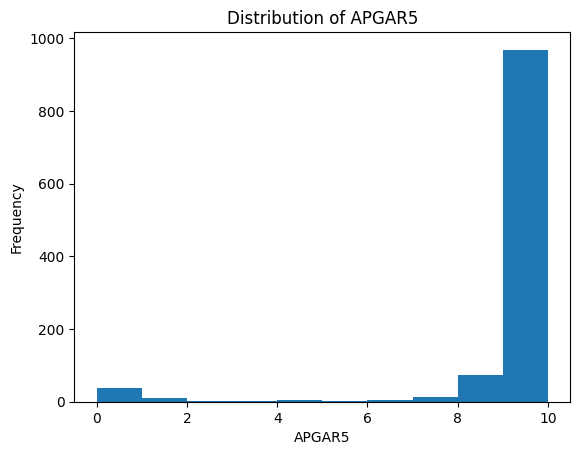

In [ ]:
# Conferir como ficou a variável depois de preenchida
dados['APGAR5'].sample(10)
dados['APGAR5'].describe()
import matplotlib.pyplot as plt
plt.hist(dados['APGAR5'])
plt.xlabel('APGAR5')
plt.ylabel('Frequency')
plt.title('Distribution of APGAR5')
plt.show()

In [ ]:
# Verificamos se existe nulos (NAN) para as variáveis
dados.isnull().sum()


,0
DT_INTERNACAO,0
DT_ALTA,0
DURACAO_INT,0
GESTACOES,0
PARTOS,1
IG_OBSTETRA,17
IG_PEDIATRA,2
ALTO_RISCO,0
TIPO_PARTO,0
HIPERTENSAO,0


In [ ]:
# Estratégia 5: preencher os NULO/vazio/missing (NULL) com valores da MEDIA da própria variável
# IMPORTANTE: entre preencher com MEDIANA ou MEDIA, sempre melhor escolher a mediana

# EQUIPAMENTO_B tem 195 casos com NULL, supondo que optamos preencher com a MEDIA

# calular a media
media_equipamento_b = dados['EQUIPAMENTO_B'].mean()

# visualizar qual foi a media calculada
print(f"Média de EQUIPAMENTO_B: {media_equipamento_b}")

# preenche os NAN (null) com a media
dados['EQUIPAMENTO_B'] = dados['EQUIPAMENTO_B'].fillna(media_equipamento_b)

Média de EQUIPAMENTO_B: 3083.1646586345382


In [ ]:
#Verificamos se NAN não existem mais
dados['EQUIPAMENTO_B'].isnull().sum()
df_sem_nulos = dados
df_sem_nulos

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.000000,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.000000,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.000000,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.000000,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,3083.164659,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.000000,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.000000,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.000000,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.000000,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


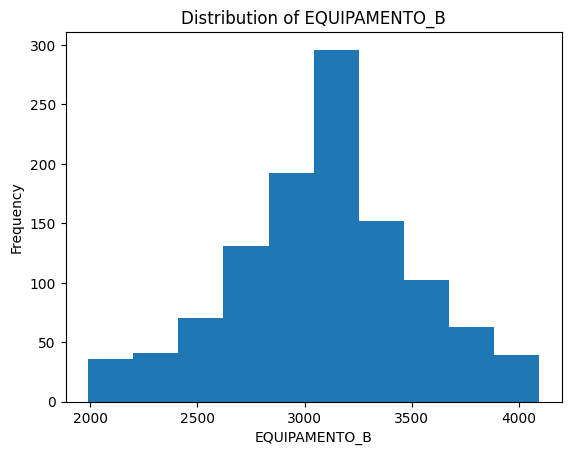

In [ ]:
# Conferir como ficou a variável depois de preenchida
dados['EQUIPAMENTO_B'].sample(10)
dados['EQUIPAMENTO_B'].describe()
import matplotlib.pyplot as plt
plt.hist(dados['EQUIPAMENTO_B'])
plt.xlabel('EQUIPAMENTO_B')
plt.ylabel('Frequency')
plt.title('Distribution of EQUIPAMENTO_B')
plt.show()

# RESUMO: Análise da qualidade das variáveis

In [ ]:
# Resumo descritivo das colunas numéricas
# Observação: que o Python entendeu como númerica na importação
dados.describe()


,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,TIPO_PARTO,HIPERTENSAO,GEMELAR,...,APGAR1,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,LATITUDE,LONGITUDE
count,1122,1122,1122.000000,1122.000000,1121.000000,1105.000000,1120.000000,1122.000000,1122.000000,1122.000000,...,1083.000000,1122.000000,1122.000000,1122.000000,1122.000000,569.000000,1122.000000,1100.000000,1122.000000,1122.000000
mean,2014-03-16 16:19:15.080214016,2014-03-19 14:54:32.727272704,2.863216,2.559715,1.240856,37.864253,37.947321,1.355615,0.120321,0.017825,...,8.036011,8.866310,0.136364,1.598930,0.065954,3089.581722,3083.164659,27.584545,-19.895586,-43.960924
min,2013-09-27 00:00:00,2013-09-29 00:00:00,0.768750,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,475.000000,1990.000000,0.000000,-20.025021,-44.111134
25%,2013-12-15 00:00:00,2013-12-18 00:00:00,1.478646,1.000000,0.000000,37.000000,37.000000,1.000000,0.000000,0.000000,...,8.000000,9.000000,0.000000,1.000000,0.000000,2795.000000,2835.000000,0.000000,-19.944788,-43.996188
50%,2014-03-06 00:00:00,2014-03-09 00:00:00,1.980555,2.000000,1.000000,39.000000,39.000000,1.000000,0.000000,0.000000,...,9.000000,9.000000,0.000000,2.000000,0.000000,3105.000000,3083.164659,1.000000,-19.897855,-43.965082
75%,2014-05-31 00:00:00,2014-06-04 12:00:00,2.530903,3.000000,2.000000,40.000000,40.000000,2.000000,0.000000,0.000000,...,9.000000,10.000000,0.000000,2.000000,0.000000,3375.000000,3345.000000,7.250000,-19.841017,-43.921759
max,2014-10-31 00:00:00,2014-11-03 00:00:00,62.537500,17.000000,10.000000,42.000000,42.000000,2.000000,1.000000,1.000000,...,10.000000,10.000000,1.000000,2.000000,3.000000,4920.000000,4095.000000,148.000000,-19.762631,-43.869659
std,NaN,NaN,4.640361,1.566401,1.340632,3.505642,3.120730,0.478913,0.325481,0.132375,...,1.811749,2.056722,0.343327,0.601454,0.412904,622.111690,423.079645,47.965649,0.060764,0.045449


Função para conveter tipos de uma coluna em outro (float => int), só é possível se não houver NAN (vazios, missings, nulos)

dados.PARTOS = dados.PARTOS.apply(np.int64)

In [ ]:
# GESTACOES
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['GESTACOES'].describe()

,GESTACOES
count,1122.000000
mean,2.559715
std,1.566401
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,17.000000


In [ ]:
# PARTOS
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['PARTOS'].describe()

,PARTOS
count,1121.000000
mean,1.240856
std,1.340632
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,10.000000


In [ ]:
# CESAREAS_PREVIAS
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['CESAREAS_PREVIAS'].describe()

,CESAREAS_PREVIAS
count,1115.000000
mean,0.358744
std,0.692679
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [ ]:
# PESO_NASCER
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['PESO_NASCER'].describe()

,PESO_NASCER
count,1102.000000
mean,3010.558076
std,674.912103
min,270.000000
25%,2730.000000
50%,3080.000000
75%,3418.750000
max,4920.000000


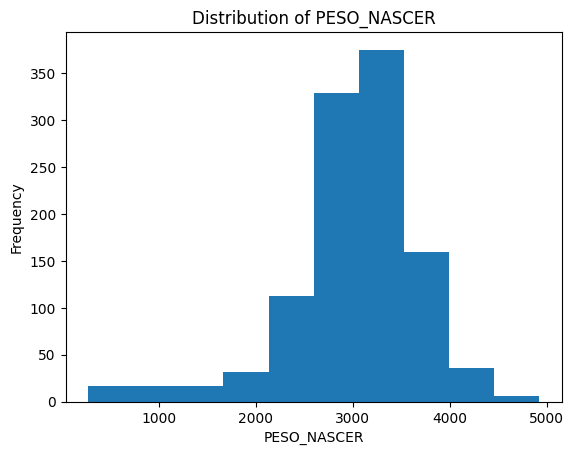

In [ ]:
# Histograma
plt.hist(dados['PESO_NASCER'])
plt.xlabel('PESO_NASCER')
plt.ylabel('Frequency')
plt.title('Distribution of PESO_NASCER')
plt.show()


In [ ]:
# IG_OBSTETRA
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['IG_OBSTETRA'].describe()

,IG_OBSTETRA
count,1105.000000
mean,37.864253
std,3.505642
min,0.000000
25%,37.000000
50%,39.000000
75%,40.000000
max,42.000000


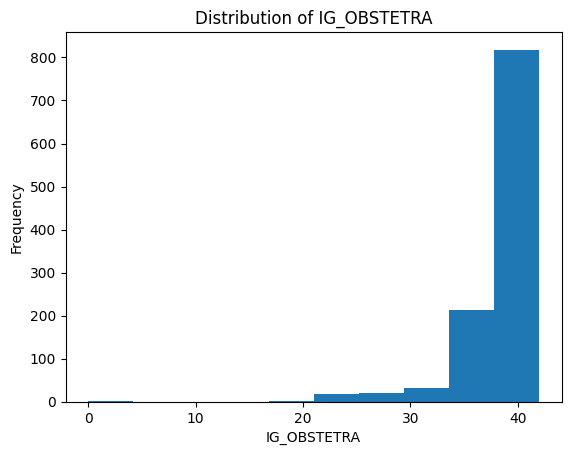

In [ ]:
# Histograma
plt.hist(dados['IG_OBSTETRA'])
plt.xlabel('IG_OBSTETRA')
plt.ylabel('Frequency')
plt.title('Distribution of IG_OBSTETRA')
plt.show()


In [ ]:
#  Limpeza de dados - 2 casos com IG = 0
casos_ig_zero = dados[dados['IG_OBSTETRA'] == 0]
print(casos_ig_zero)


     DT_INTERNACAO    DT_ALTA  DURACAO_INT  GESTACOES  PARTOS  IG_OBSTETRA  \
169     2014-01-31 2014-02-01     1.236806          2     1.0          0.0   
1346    2014-04-17 2014-04-20     3.000000          4     3.0          0.0   

      IG_PEDIATRA ALTO_RISCO  TIPO_PARTO  HIPERTENSAO  ...  APGAR5  UTI_RN  \
169          40.0        sim           2            0  ...     2.0       0   
1346         38.0        sim           2            0  ...    10.0       1   

      LIGADURACORDAO  LC_MOTIVO  EQUIPAMENTO_A  EQUIPAMENTO_B  UBS  \
169                1          0            NaN         2695.0  1.0   
1346               2          0         3270.0         3250.0  3.0   

                BAIRRO   LATITUDE  LONGITUDE  
169           Taquaril -19.810148 -43.994976  
1346  Primeiro de Maio -19.872618 -43.922188  

[2 rows x 34 columns]


In [ ]:
#  Limpeza de dados
#  Preencher com null (nan) os valores 0
dados.loc[dados['IG_OBSTETRA'] == 0, 'IG_OBSTETRA'] = np.nan
df_sem_nulos = dados
df_sem_nulos

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.000000,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.000000,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.000000,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.000000,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,3083.164659,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.000000,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.000000,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.000000,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.000000,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


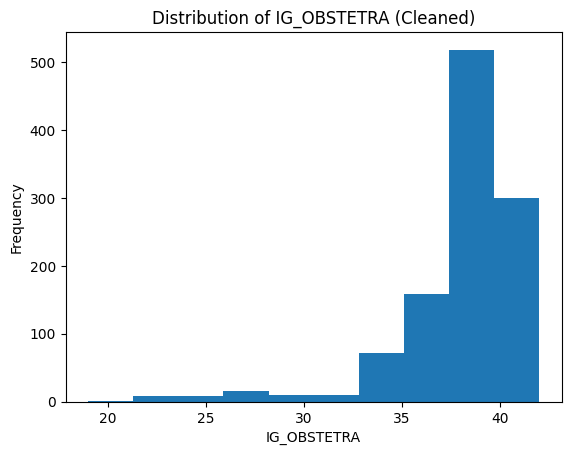

In [ ]:
# Histograma
plt.hist(dados['IG_OBSTETRA'])
plt.xlabel('IG_OBSTETRA')
plt.ylabel('Frequency')
plt.title('Distribution of IG_OBSTETRA (Cleaned)')
plt.show()

In [ ]:
# IG_PEDIATRA
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['IG_PEDIATRA'].describe()

,IG_PEDIATRA
count,1120.000000
mean,37.947321
std,3.120730
min,9.000000
25%,37.000000
50%,39.000000
75%,40.000000
max,42.000000


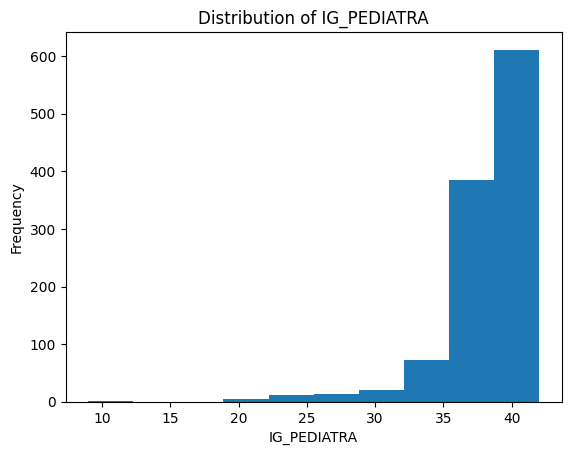

In [ ]:
# Histograma
plt.hist(dados['IG_PEDIATRA'])
plt.xlabel('IG_PEDIATRA')
plt.ylabel('Frequency')
plt.title('Distribution of IG_PEDIATRA')
plt.show()


In [ ]:
#  Limpeza de dados
#  Preencher com null (nan) os valores 9
dados.loc[dados['IG_PEDIATRA'] == 9, 'IG_PEDIATRA'] = np.nan


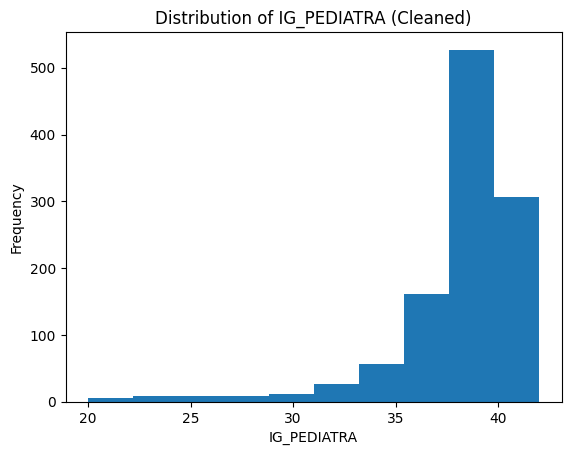

In [ ]:
# Histograma
plt.hist(dados['IG_PEDIATRA'])
plt.xlabel('IG_PEDIATRA')
plt.ylabel('Frequency')
plt.title('Distribution of IG_PEDIATRA (Cleaned)')
plt.show()

In [ ]:
# DURACAO_INT
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados['DURACAO_INT'].describe()

,DURACAO_INT
count,1122.000000
mean,2.863216
std,4.640361
min,0.768750
25%,1.478646
50%,1.980555
75%,2.530903
max,62.537500


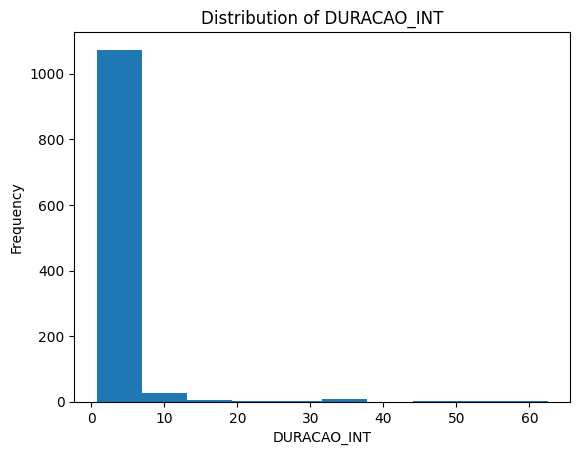

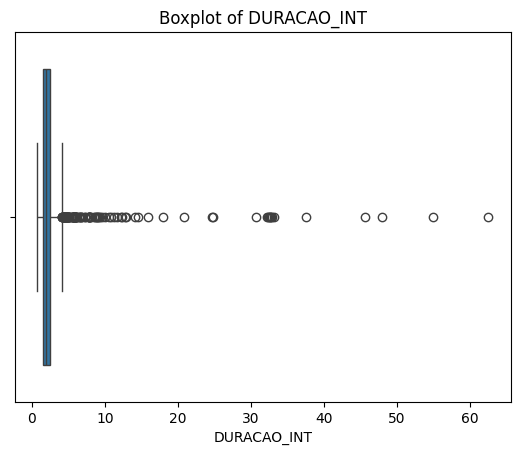

DURACAO_INT
2.000000     13
2.333333      8
2.041667      7
1.333333      6
1.708333      6
             ..
1.763889      1
1.767361      1
1.768750      1
1.770833      1
62.537500     1
Name: count, Length: 910, dtype: int64


In [ ]:
# analisar os casos
import matplotlib.pyplot as plt
plt.hist(dados['DURACAO_INT'])
plt.xlabel('DURACAO_INT')
plt.ylabel('Frequency')
plt.title('Distribution of DURACAO_INT')
plt.show()

sns.boxplot(x=dados['DURACAO_INT'])
plt.xlabel('DURACAO_INT')
plt.title('Boxplot of DURACAO_INT')
plt.show()

print(dados['DURACAO_INT'].value_counts())

In [ ]:
# Vamos arrendodar para dias inteiros
dados['DURACAO_INT'] = dados['DURACAO_INT'].round().astype(int)


# Recodificação de variáveis

In [ ]:
# TIPO_PARTO - Contando a quantidade de casos por categoria
tipo_parto_counts = dados['TIPO_PARTO'].value_counts()
print(tipo_parto_counts)
dados['TIPO_PARTO'] = dados['TIPO_PARTO'].map({1: 'Vaginal', 2: 'Cesarean'})
tipo_parto_counts = dados['TIPO_PARTO'].value_counts()
print(tipo_parto_counts)



TIPO_PARTO
1    723
2    399
Name: count, dtype: int64
TIPO_PARTO
Vaginal     723
Cesarean    399
Name: count, dtype: int64


In [ ]:
# Trocar os números pelo conteúdo das categorias
# Já se sabe pela documentação da Base de dados que:
# 1 = partos vaginais
# 2 = partos cesáreos
dados['TIPO_PARTO'] = dados['TIPO_PARTO'].map({1: 'Vaginal', 2: 'Cesarean'})
dados['TIPO_PARTO'].value_counts()


,count
TIPO_PARTO,


In [ ]:
# GEMELAR - Contando a quantidade de casos por categoria
gemelar_counts = dados['GEMELAR'].value_counts()
print(gemelar_counts)
dados['GEMELAR'] = dados['GEMELAR'].map({1: 'Sim', 2: 'Não'})
gemelar_counts = dados['GEMELAR'].value_counts()
print(gemelar_counts)


GEMELAR
0    1102
1      20
Name: count, dtype: int64
GEMELAR
Sim    20
Name: count, dtype: int64


In [ ]:
# GEMELAR - recodificar ==>   0 = Não, 1 = Sim
dados['GEMELAR'] = dados['GEMELAR'].map({0: 'Não', 1: 'Sim'})
dados['GEMELAR'].value_counts()

,count
GEMELAR,


In [ ]:
# ALTO_RISCO - Contando a quantidade de casos por categoria
alto_risco_counts = dados['ALTO_RISCO'].value_counts()
print(alto_risco_counts)

ALTO_RISCO
não    599
sim    515
nao      3
Nao      3
Sim      2
Name: count, dtype: int64


In [ ]:
# ALTO_RISCO - Limpeza e Tratamento de dados, recodificar valores de texto

print(dados['ALTO_RISCO'].value_counts())
# Converter a coluna 'ALTO_RISCO' para o tipo string antes de aplicar métodos de string
dados['ALTO_RISCO'] = dados['ALTO_RISCO'].astype(str)
dados['ALTO_RISCO'] = dados['ALTO_RISCO'].str.lower()
dados['ALTO_RISCO'] = dados['ALTO_RISCO'].str.strip()
dados['ALTO_RISCO'] = dados['ALTO_RISCO'].replace({'sim': 1, 'não': 0, 'nao':0})
dados['ALTO_RISCO'].value_counts()


ALTO_RISCO
0    605
1    517
Name: count, dtype: int64


,count
ALTO_RISCO,
0,605
1,517


In [ ]:
# SEXO - Contando a quantidade de casos por categoria
sexo_counts = dados['SEXO'].value_counts()
sexo_counts

,count
SEXO,
Masculino,570
Feminino,514


In [ ]:
# SEXO - recodificar ==>
#  0 = missing (não preenchido), 1 = masculino, 2 = feminino, 3 = indeterminado

#  Para análise deste estudo, vamos considerar os valores 0 e 3 como missings (nulos)
#  Preencher com null (nan) os valores 0 e 3


# SEXO - recodificar ==>   1 = Masculino, 2 = Feminino
dados['SEXO'] = dados['SEXO'].replace({0: np.nan, 3: np.nan})
print(dados['SEXO'].value_counts())
dados['SEXO'] = dados['SEXO'].replace({0: np.nan, 3: np.nan})
print(dados['SEXO'].value_counts())
dados['SEXO'] = dados['SEXO'].map({1: 'Masculino', 2: 'Feminino'})
dados['SEXO'].value_counts()


SEXO
Masculino    570
Feminino     514
Name: count, dtype: int64
SEXO
Masculino    570
Feminino     514
Name: count, dtype: int64


,count
SEXO,


In [ ]:
# CM_LACERACAO_CANAL - Contando a quantidade de casos por categoria
laceracao_canal_counts = dados['CM_LACERACAO_CANAL'].value_counts()
laceracao_canal_counts


,count
CM_LACERACAO_CANAL,
não houve,732
Grau I,177
Grau II,96
Grau III,15
Grau IV,1


In [ ]:
# CM_LACERACAO_CANAL - recodificar ==>   0 = não houve, 1 = Grau I, 2 - Grau II, 3 - Grau III, 4 Grau IV
dados['CM_LACERACAO_CANAL'] = dados['CM_LACERACAO_CANAL'].map({0: 'não houve', 1: 'Grau I', 2: 'Grau II', 3: 'Grau III', 4: 'Grau IV'})
dados['CM_LACERACAO_CANAL'].value_counts()


,count
CM_LACERACAO_CANAL,
não houve,732
Grau I,177
Grau II,96
Grau III,15
Grau IV,1


In [ ]:
# LIGADURACORDAO - Contando a quantidade de casos por categoria
ligaduracordao_counts = dados['LIGADURACORDAO'].value_counts()
ligaduracordao_counts

,count
LIGADURACORDAO,
Não se aplica ou não informado,740
Sim,314
Não,68


In [ ]:
# LIGADURACORDAO - recodificar ==>   0 = Não, 1 = Sim, 2 = Não se aplica ou não informado
dados['LIGADURACORDAO'] = dados['LIGADURACORDAO'].map({0: 'Não', 1: 'Sim', 2: 'Não se aplica ou não informado'})
dados['LIGADURACORDAO'].value_counts()

#  Para análise deste estudo, vamos considerar os valores 2 como missings (nulos)
#  Preencher com null (nan) o valor 2
dados['LIGADURACORDAO'] = dados['LIGADURACORDAO'].replace(2, np.nan)
dados['LIGADURACORDAO'].value_counts()


,count
LIGADURACORDAO,
Não se aplica ou não informado,740
Sim,314
Não,68


In [ ]:
# LC_MOTIVO - Contando a quantidade de casos por categoria
lc_motivo_counts = dados['LC_MOTIVO'].value_counts()
lc_motivo_counts


,count
LC_MOTIVO,
Aloimunização Rh,18
RN asfixia,7
Mãe soropositiva,6


In [ ]:
# LC_MOTIVO - recodificar ==>   0 = Não se aplica ou não informado, 1 Mãe soropositiva, 2 RN asfixia, 3 Aloimunização Rh
dados['LC_MOTIVO'] = dados['LC_MOTIVO'].map({0: 'Não se aplica ou não informado', 1: 'Mãe soropositiva', 2: 'RN asfixia', 3: 'Aloimunização Rh'})
dados['LC_MOTIVO'].value_counts()

#  Para análise deste estudo, vamos considerar os valores 0 como missings (nulos)
#  Preencher com null (nan) o valor 0
import numpy as np
dados['LC_MOTIVO'] = dados['LC_MOTIVO'].replace('Não se aplica ou não informado', np.nan)
dados['LC_MOTIVO'].value_counts()


,count
LC_MOTIVO,


# Salvar os dados atuais em um novo arquivo

In [ ]:
# listar o DataFrame com a Limpeza e o tratamento de dados realizado
dados.sample(3)
dados.head()
dados.tail()
dados.info()
dados.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1708
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DT_INTERNACAO       1122 non-null   datetime64[ns]
 1   DT_ALTA             1122 non-null   datetime64[ns]
 2   DURACAO_INT         1122 non-null   int64         
 3   GESTACOES           1122 non-null   int64         
 4   PARTOS              1121 non-null   float64       
 5   IG_OBSTETRA         1103 non-null   float64       
 6   IG_PEDIATRA         1119 non-null   float64       
 7   ALTO_RISCO          1122 non-null   int64         
 8   TIPO_PARTO          0 non-null      object        
 9   HIPERTENSAO         1122 non-null   int64         
 10  GEMELAR             0 non-null      object        
 11  CESAREAS_PREVIAS    1115 non-null   float64       
 12  EPISIOTOMIA         1122 non-null   int64         
 13  ANALGESIA           1122 non-null   int64         
 1

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,HIPERTENSAO,CESAREAS_PREVIAS,...,VIVO,PESO_NASCER,APGAR1,APGAR5,UTI_RN,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,LATITUDE,LONGITUDE
count,1122,1122,1122.000000,1122.000000,1121.000000,1103.000000,1119.000000,1122.000000,1122.000000,1115.000000,...,1097.000000,1102.000000,1083.000000,1122.000000,1122.000000,569.000000,1122.000000,1100.000000,1122.000000,1122.000000
mean,2014-03-16 16:19:15.080214016,2014-03-19 14:54:32.727272704,2.854724,2.559715,1.240856,37.932910,37.973190,0.460784,0.120321,0.358744,...,0.983592,3010.558076,8.036011,8.866310,0.136364,3089.581722,3083.164659,27.584545,-19.895586,-43.960924
min,2013-09-27 00:00:00,2013-09-29 00:00:00,1.000000,1.000000,0.000000,19.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,270.000000,0.000000,0.000000,0.000000,475.000000,1990.000000,0.000000,-20.025021,-44.111134
25%,2013-12-15 00:00:00,2013-12-18 00:00:00,1.000000,1.000000,0.000000,37.000000,37.000000,0.000000,0.000000,0.000000,...,1.000000,2730.000000,8.000000,9.000000,0.000000,2795.000000,2835.000000,0.000000,-19.944788,-43.996188
50%,2014-03-06 00:00:00,2014-03-09 00:00:00,2.000000,2.000000,1.000000,39.000000,39.000000,0.000000,0.000000,0.000000,...,1.000000,3080.000000,9.000000,9.000000,0.000000,3105.000000,3083.164659,1.000000,-19.897855,-43.965082
75%,2014-05-31 00:00:00,2014-06-04 12:00:00,3.000000,3.000000,2.000000,40.000000,40.000000,1.000000,0.000000,1.000000,...,1.000000,3418.750000,9.000000,10.000000,0.000000,3375.000000,3345.000000,7.250000,-19.841017,-43.921759
max,2014-10-31 00:00:00,2014-11-03 00:00:00,63.000000,17.000000,10.000000,42.000000,42.000000,1.000000,1.000000,5.000000,...,1.000000,4920.000000,10.000000,10.000000,1.000000,4920.000000,4095.000000,148.000000,-19.762631,-43.869659
std,NaN,NaN,4.677210,1.566401,1.340632,3.115303,2.999582,0.498682,0.325481,0.692679,...,0.127098,674.912103,1.811749,2.056722,0.343327,622.111690,423.079645,47.965649,0.060764,0.045449


In [ ]:
# salvar em excel, um novo arquivo, com os dados tratados
dados.to_excel('BD_PARTOS_tratado.xlsx', index=False)
files.download('BD_PARTOS_tratado.xlsx')